# Image Manipulation 

1- Read and display the image "mandrill.png" using the functions cv.imread and plt.imshow
Note: In the case of color images, the cv.imread function stores the RGB channels in the reverse order
BGR, so you need to swap them using the cv.cvtColor statement with cv.COLOR_BGR2RGB.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io , exposure , img_as_ubyte

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
def plot_comparison(original, filtered, title_filtered):
    print(original.shape)
    print(filtered.shape)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)    
    ax2.set_title(title_filtered)    
    ax2.axis('off')

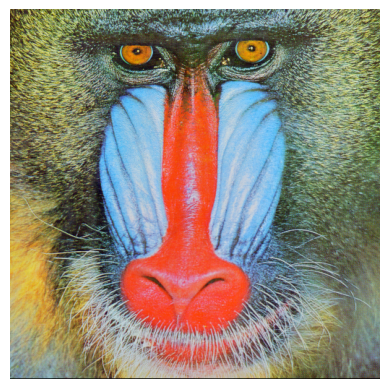

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("mandrill.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()

2- Display the size and depth of the image using the functions img.shape and img.dtype.
Why are the image values of type "uint8"?

In [4]:
print("Image Shape:", img.shape)
print("Image Depth:", img.dtype)
print("Image values are of type uint8 because each channel's intensity values range from 0 to 255.")


Image Shape: (512, 512, 3)
Image Depth: uint8
Image values are of type uint8 because each channel's intensity values range from 0 to 255.


3- Separate the RGB channels and visualize each channel independently.Explain how the mandrill's eyes appear in the three RGB components

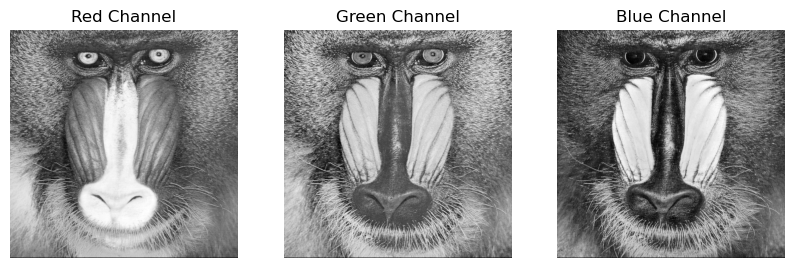

In [5]:
b_channel, g_channel, r_channel  = cv2.split(img)

# Visualize each channel independently
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(r_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(g_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(b_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.show()


#### Explanation: 
Orange is a mixture of about 100% red, 41% green, and 12% blue:
- **For Red Channel :** The mandrill's orange eyes are almost white (since orange contains a lot of red)

- **For Green Channel :** The mandrill's eyes appear gray (since orange contains about 40% green).

- **For Blue Channel :** The mandrill's eyes are almost black (since orange has just 12% blue in it).


4- Store the R component of the image in a .png file, the G component in a .bmp file, 
and the B component in a .jpeg file using the cv.imwrite instruction.

In [6]:
cv2.imwrite("red_component.png", r_channel)
cv2.imwrite("green_component.bmp", g_channel)
cv2.imwrite("blue_component.jpeg", b_channel)


True

5- Perform grayscale conversion using the following expression:
    luminance = 0.2126 × Red + 0.7152 × Green + 0.0722 × Blue.
and after this using the cv2color function.

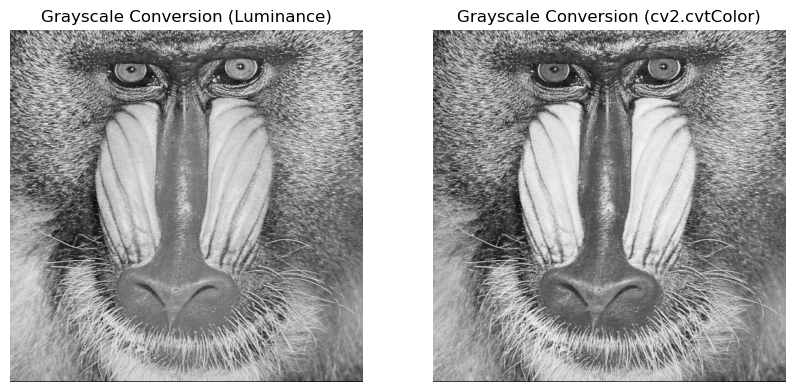

In [7]:
luminance = 0.2126 * r_channel + 0.7152 * g_channel + 0.0722 * b_channel
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Compare the two results
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(luminance, cmap='gray')
plt.title('Grayscale Conversion (Luminance)')
plt.axis('off')

plt.subplot(122)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Conversion (cv2.cvtColor)')
plt.axis('off')

plt.show()


6- Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

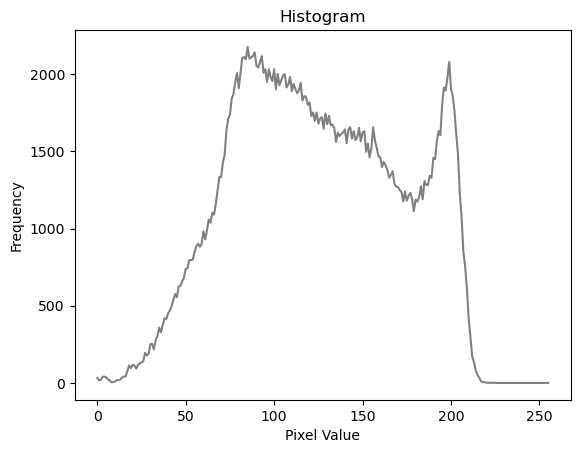

Minimum Pixel Value: 0
Maximum Pixel Value: 225


In [8]:
hist, bins = np.histogram(gray_img.flatten(), bins=256, range=[0,256])
plt.plot(hist, color='gray')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

print("Minimum Pixel Value:", np.min(gray_img))
print("Maximum Pixel Value:", np.max(gray_img))

# Comments: The histogram shows the distribution of pixel values. The extrema give the minimum and maximum pixel values in the image.
# The quality of the image can be assessed by examining if the pixel values cover a reasonable range and if there's a good distribution.


- The histogram shows the distribution of pixel values. The extrema give the minimum and maximum pixel values in the image.
- We can see that the histogram is more or less evenly distributed, which means that there is no peak on a particular shade of black more than others, therefore the image quality is decent.

## Quantization

We want to determine the influence of variable quantization steps,

1- Change the quantization step of the image to obtain 128, 64, 32, 16, 8, 4, and 2 levels of gray.

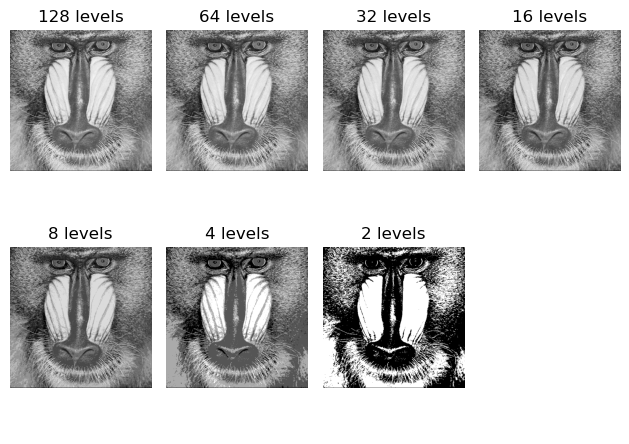

In [9]:

quantized_img_2 = (gray_img // 128) * 128
quantized_img_4 = (gray_img // 64) * 64
quantized_img_8 = (gray_img // 32) * 32
quantized_img_16 = (gray_img // 16) * 16
quantized_img_32 = (gray_img // 8) * 8
quantized_img_64= (gray_img // 4) * 4
quantized_img_128= (gray_img // 2) * 2



fig, ax = plt.subplots(2,4)
ax[0,0].imshow(quantized_img_128, cmap = 'gray')
ax[0,1].imshow(quantized_img_64, cmap = 'gray')
ax[0,2].imshow(quantized_img_32, cmap = 'gray')
ax[0,3].imshow(quantized_img_16, cmap = 'gray')
ax[1,0].imshow(quantized_img_8, cmap = 'gray')
ax[1,1].imshow(quantized_img_4, cmap = 'gray')
ax[1,2].imshow(quantized_img_2, cmap = 'gray')

for k in range(2):
    for j in range(4):
        ax[k,j].axis('off')


ax[0,0].set_title("128 levels")
ax[0,1].set_title("64 levels")
ax[0,2].set_title("32 levels")
ax[0,3].set_title("16 levels")
ax[1,0].set_title("8 levels")
ax[1,1].set_title("4 levels")
ax[1,2].set_title("2 levels")

plt.tight_layout()


2- Determine the minimum quantization level at which false contours appear (display the images for this).

(512, 512)
(512, 512)


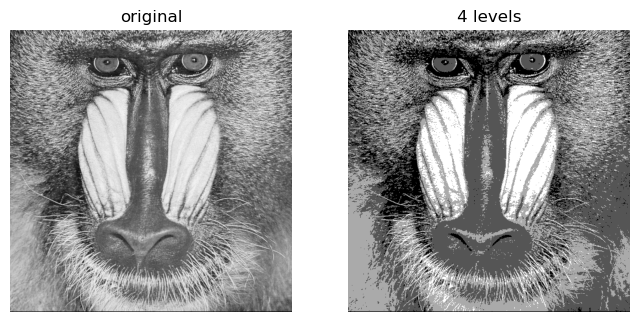

In [10]:
plot_comparison(gray_img , quantized_img_4 , '4 levels')

3- Calculate and display the histogram of each quantization

                                    2 levels


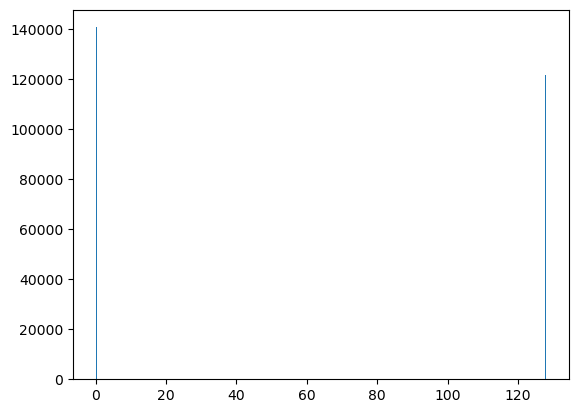

                                    4 levels


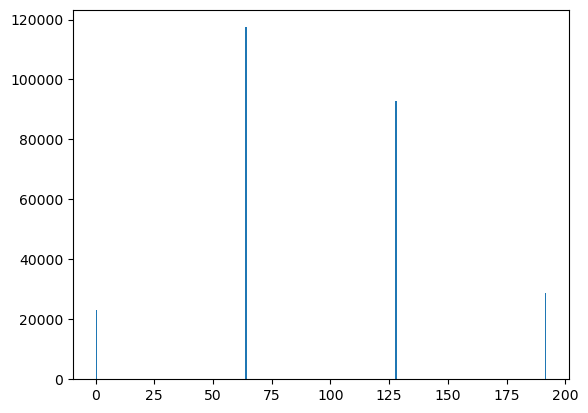

                                    8 levels


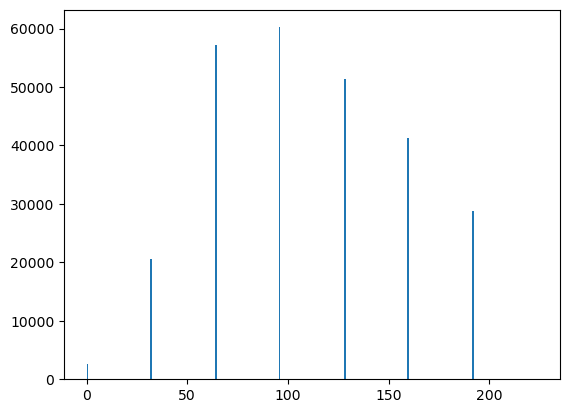

                                    16 levels


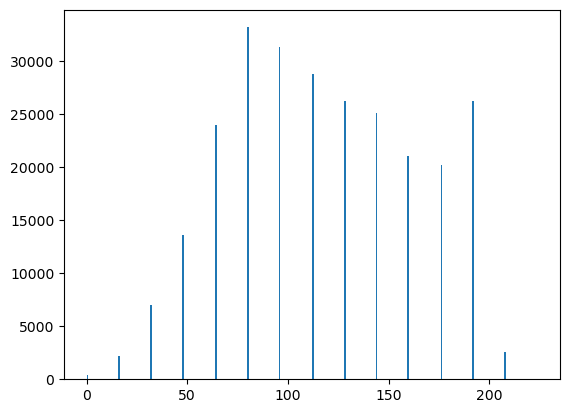

                                    32 levels


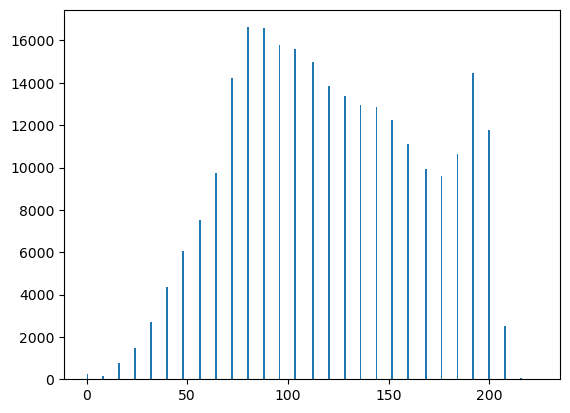

                                    64 levels


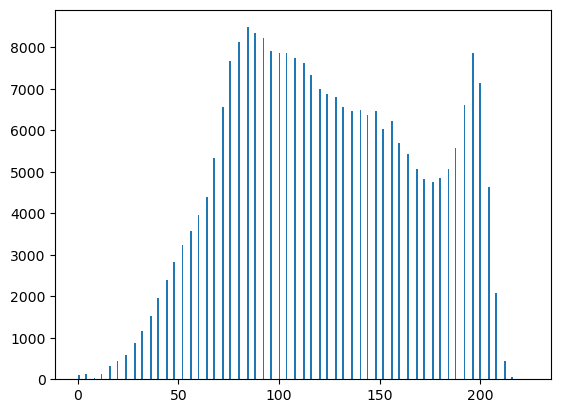

                                    128 levels


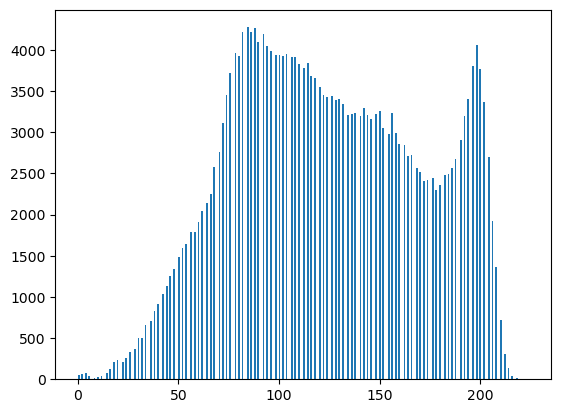

In [11]:
quantizations = [quantized_img_2 , quantized_img_4 ,
                 quantized_img_8 , quantized_img_16 , quantized_img_32,
                 quantized_img_64, quantized_img_128 ]

for j,i in enumerate(quantizations):
    plt.hist(i.ravel() , bins=256)
    print("                                    " + str(pow(2,j+1)) + " levels")
    plt.show()


## Histogram Equalization

1- Read and display the 'flower.bmp' image and convert the image to grayscale.

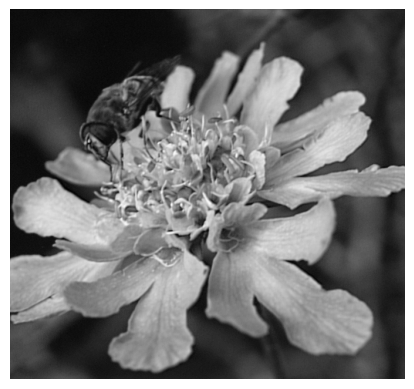

In [12]:
flower_img = cv2.imread('flower.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(flower_img, cmap='gray')
plt.axis('off')
plt.show()


2- Calculate and display the histogram and the normalized histogram. Provide comments.

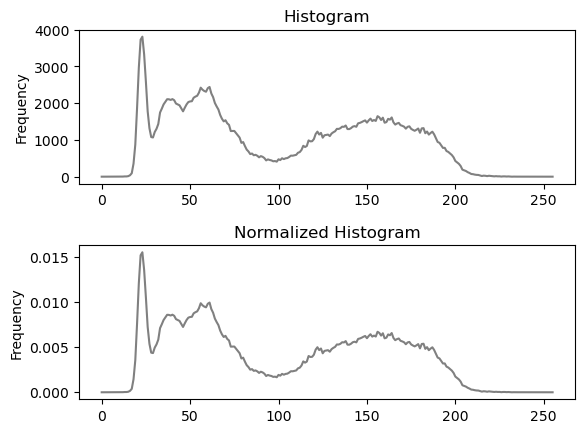

In [13]:
hist, bins = np.histogram(flower_img.flatten(), bins=256, range=[0,256])
normalized_hist = hist / float(flower_img.size)

fig, ax = plt.subplots(2,1)
ax[0].plot(hist, color='gray')
ax[0].set_title('Histogram')
ax[0].set_ylabel('Frequency')

ax[1].plot(normalized_hist, color='gray')
ax[1].set_title('Normalized Histogram')
ax[1].set_ylabel('Frequency')

plt.subplots_adjust(hspace=0.4)
plt.show()

3- Calculate and display the cumulative histogram. Provide comments.

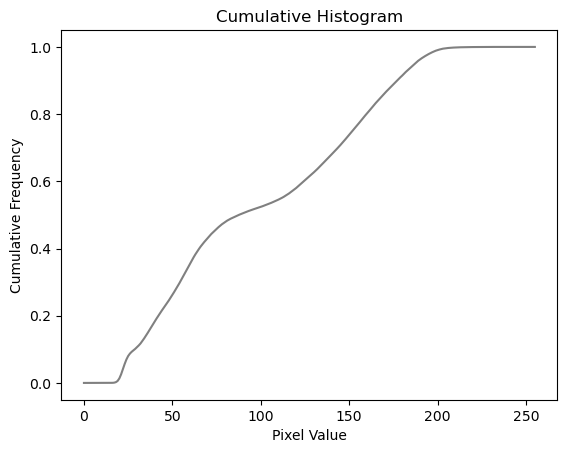

In [14]:
cumulative_hist = np.cumsum(normalized_hist)

plt.plot(cumulative_hist, color='gray')
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.show()


4- Perform histogram equalization, display the equalized histogram, and provide comments.

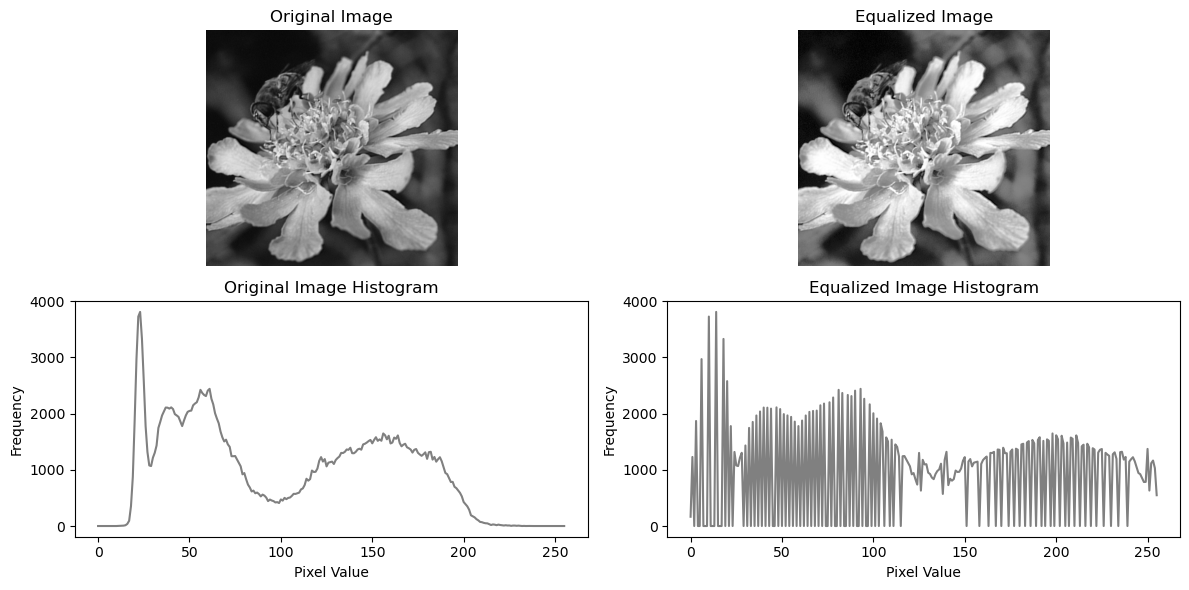

In [15]:
equalized_img = cv2.equalizeHist(flower_img)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(flower_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display the histograms
hist_original, bins_original = np.histogram(flower_img.flatten(), bins=256, range=[0, 256])
hist_equalized, bins_equalized = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='gray')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='gray')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

By making the pixel intensities more evenly distributed across the entire range, the image's contrast is enhanced and the details are improved.

6- Equalize the 3 color components independently, then visualize the resulting image and calculate its entropy.

In [16]:
equalized_r = cv2.equalizeHist(img[:, :, 0])
equalized_g = cv2.equalizeHist(img[:, :, 1])
equalized_b = cv2.equalizeHist(img[:, :, 2])

equalized_color_img = cv2.merge([equalized_r, equalized_g, equalized_b])

epsilon = 1e-06

hist_distr = (hist+epsilon) / np.sum(hist+epsilon)
norm_hist_distr = (normalized_hist+epsilon) / np.sum(normalized_hist+epsilon)

x = -np.sum(norm_hist_distr * np.log2(norm_hist_distr))
y = -np.sum(hist_distr * np.log2(hist_distr))

In [17]:
print(f'the entropy of the histogram is : {y}')

the entropy of the histogram is : 7.410710034018018


In [18]:
print(f'the entropy of the normalised histogram is : {x}')

the entropy of the normalised histogram is : 7.411460365843701


7- Equalize the 3 color components based on the cumulative histogram from question 4, then visualize the corresponding image. Calculate its entropy.

Entropy of the original image: 17.6630
Entropy of the equalized image: 17.6349


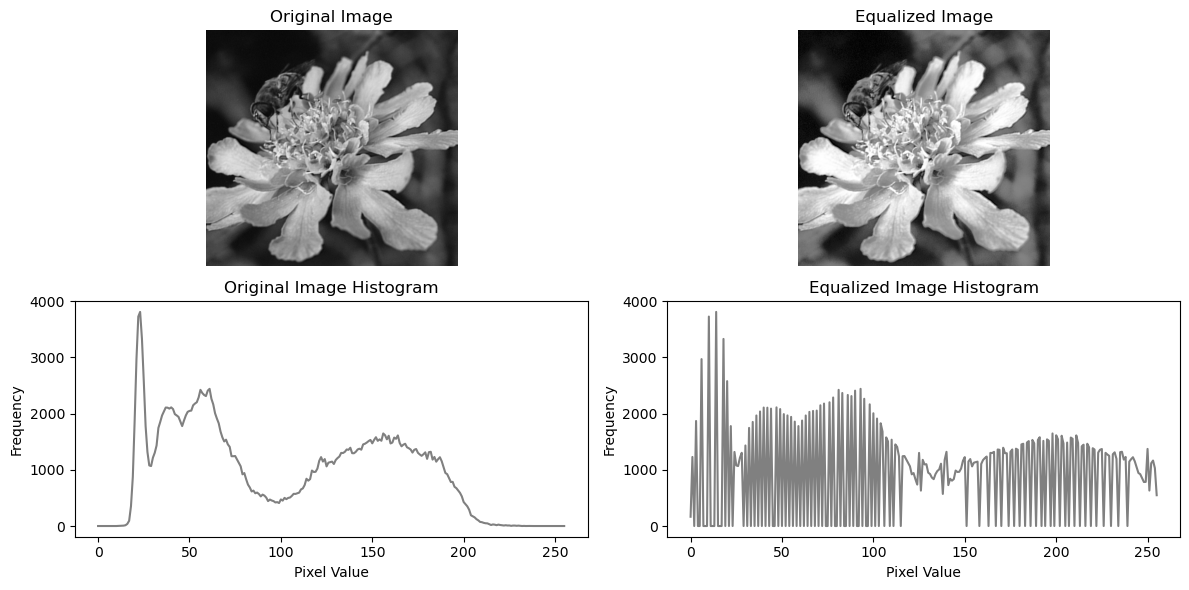

In [19]:
from scipy.stats import entropy

# Perform histogram equalization on the grayscale image
equalized_img = cv2.equalizeHist(flower_img)

# Calculate entropy for the original and equalized images
entropy_original = entropy(flower_img.flatten(), base=2)
entropy_equalized = entropy(equalized_img.flatten(), base=2)

# Visualize the images and histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(flower_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Display the histograms for the original grayscale image
hist_original, bins_original = np.histogram(flower_img.flatten(), bins=256, range=[0, 256])
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='gray')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Display the histogram for the equalized grayscale image
hist_equalized, bins_equalized = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='gray')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()

# Print the entropy values
print(f'Entropy of the original image: {entropy_original:.4f}')
print(f'Entropy of the equalized image: {entropy_equalized:.4f}')

plt.show()


# Noise Reduction

I. Add Gaussian noise to the image with zero mean and standard deviation σ = 0.01. Display the noisy image.

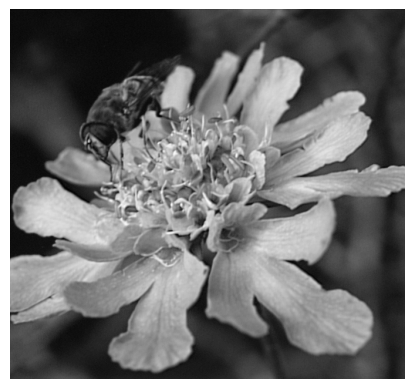

In [20]:
noise = np.random.normal(0, 0.01, flower_img.shape)
noisy_img = flower_img + noise

plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.show()


A. Mean Filter
1. Apply a 3x3 average filtering using the "cv.blur" function. Display the result and provide comments. What is the size of the obtained image? How were the edges treated? Change the method and comment.
2. Perform subtraction between the original image and the filtered image. Display the result and comment.
3. Repeat steps 2-4 for mask sizes of 5x5, 6x6, and 7x7. Conclude.

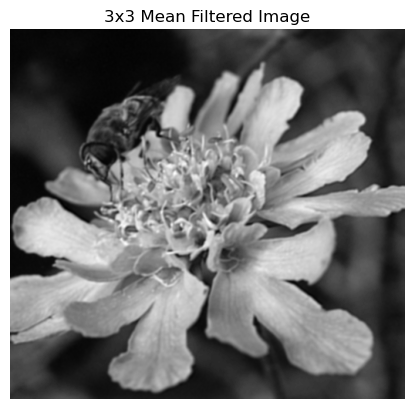

In [21]:
# Question 1

filtered_img_3x3 = cv2.blur(noisy_img, (3, 3))
# Display the result
plt.imshow(filtered_img_3x3, cmap='gray')
plt.title('3x3 Mean Filtered Image')
plt.axis('off')
plt.show()

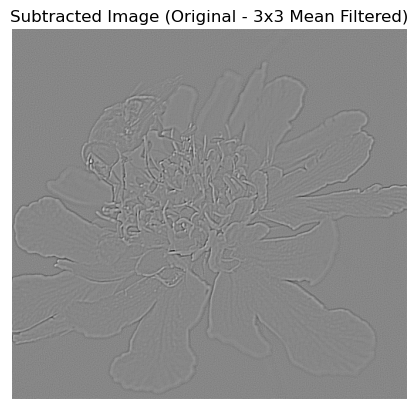

In [22]:
# Question 2
subtracted_img_3x3 = flower_img - filtered_img_3x3

# Display the result
plt.imshow(subtracted_img_3x3, cmap='gray')
plt.title('Subtracted Image (Original - 3x3 Mean Filtered)')
plt.axis('off')
plt.show()


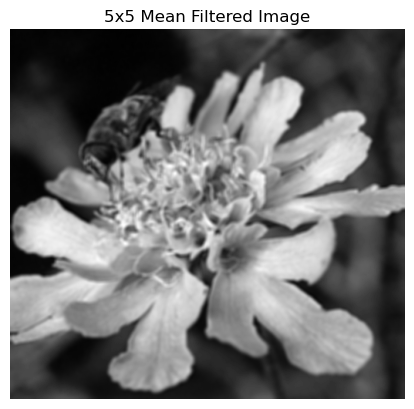

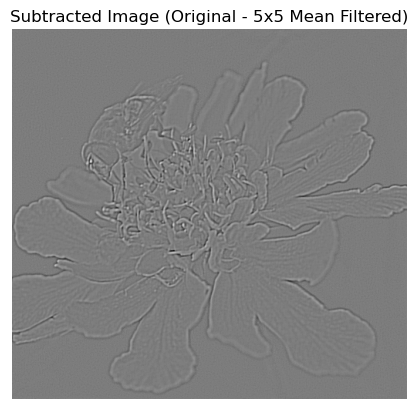

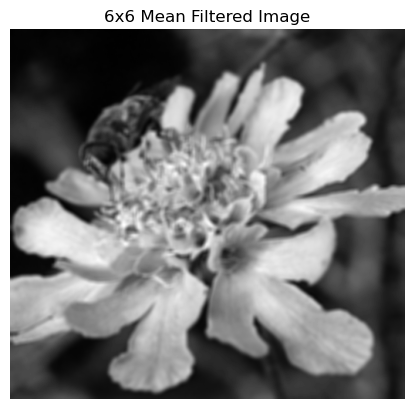

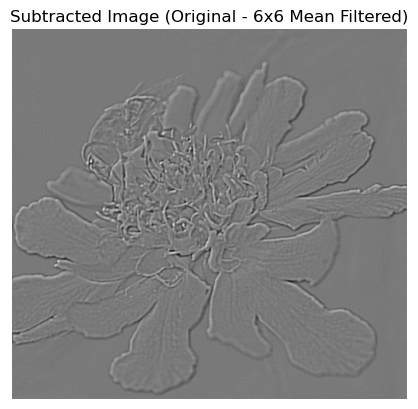

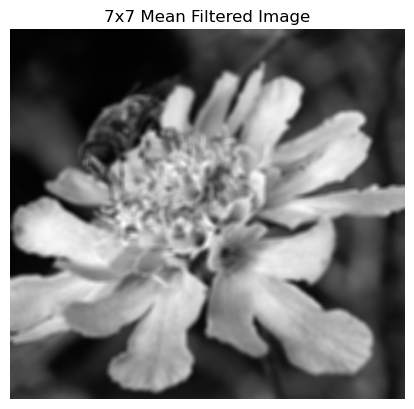

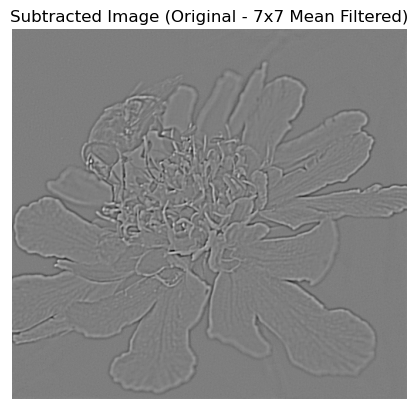

In [23]:
# Question 3
mask_sizes = [5, 6, 7]

for size in mask_sizes:
    filtered_img = cv2.blur(noisy_img, (size, size))
    
    # Display the filtered image
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'{size}x{size} Mean Filtered Image')
    plt.axis('off')
    plt.show()
    
    # Subtract original image from the filtered image
    subtracted_img = flower_img - filtered_img

    # Display the result
    plt.imshow(subtracted_img, cmap='gray')
    plt.title(f'Subtracted Image (Original - {size}x{size} Mean Filtered)')
    plt.axis('off')
    plt.show()

#### Conclusion:

As the mask size increases, the smoothing effect becomes more pronounced.
Larger mask sizes result in more blurring, which may lead to loss of finer details.
Smaller mask sizes preserve more details but may not effectively reduce noise.
The choice of the mask size depends on the trade-off between noise reduction and preservation of image details.

B. Gaussian Filter
1. Apply a 3x3 Gaussian filtering with σ = 1 using the "cv.GaussianBlur" function. Display the result and comment.
2. Investigate the influence of the filter size and the value of the standard deviation.
3. Select the mask that seems best to you. Perform subtraction between the original image and the filtered image. Comment.

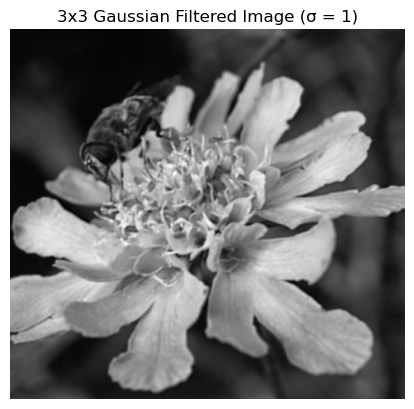

In [24]:
# Question 1

# Apply a 3x3 Gaussian filter with σ = 1 using cv.GaussianBlur
filtered_img_gaussian_3x3 = cv2.GaussianBlur(noisy_img, (3, 3), sigmaX=1)

# Display the result
plt.imshow(filtered_img_gaussian_3x3, cmap='gray')
plt.title('3x3 Gaussian Filtered Image (σ = 1)')
plt.axis('off')
plt.show()


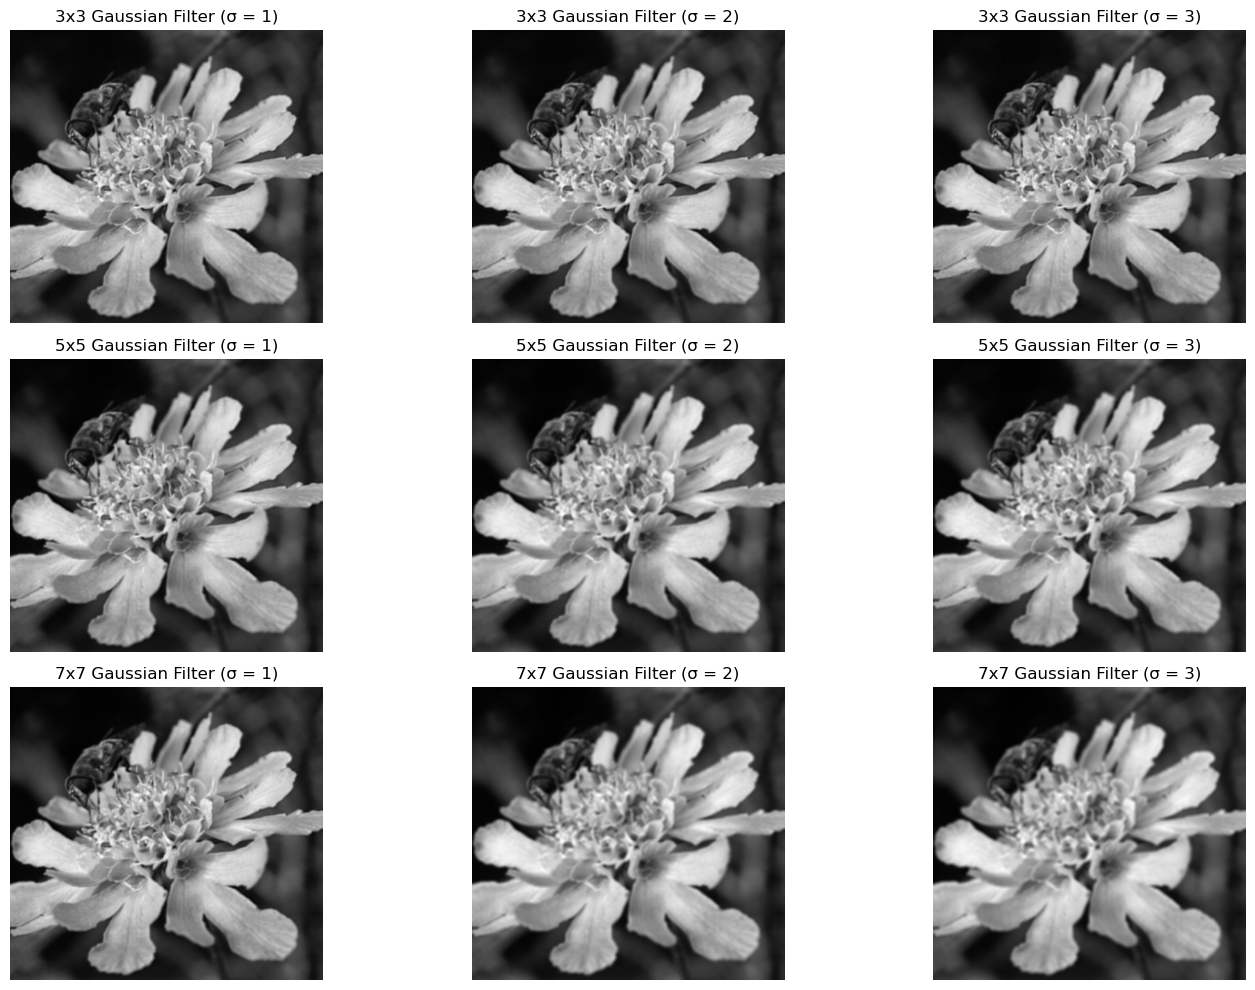

In [25]:
# Question 2
# Investigate the influence of filter size and standard deviation
filter_sizes = [3, 5, 7]
sigmas = [1, 2, 3]

plt.figure(figsize=(15, 10))

for size in filter_sizes:
    for sigma in sigmas:
        # Apply Gaussian filter with varying size and σ
        filtered_img = cv2.GaussianBlur(noisy_img, (size, size), sigmaX=sigma)
        
        # Display the filtered image
        plt.subplot(len(filter_sizes), len(sigmas), filter_sizes.index(size) * len(sigmas) + sigmas.index(sigma) + 1)
        plt.imshow(filtered_img, cmap='gray')
        plt.title(f'{size}x{size} Gaussian Filter (σ = {sigma})')
        plt.axis('off')

plt.tight_layout()
plt.show()


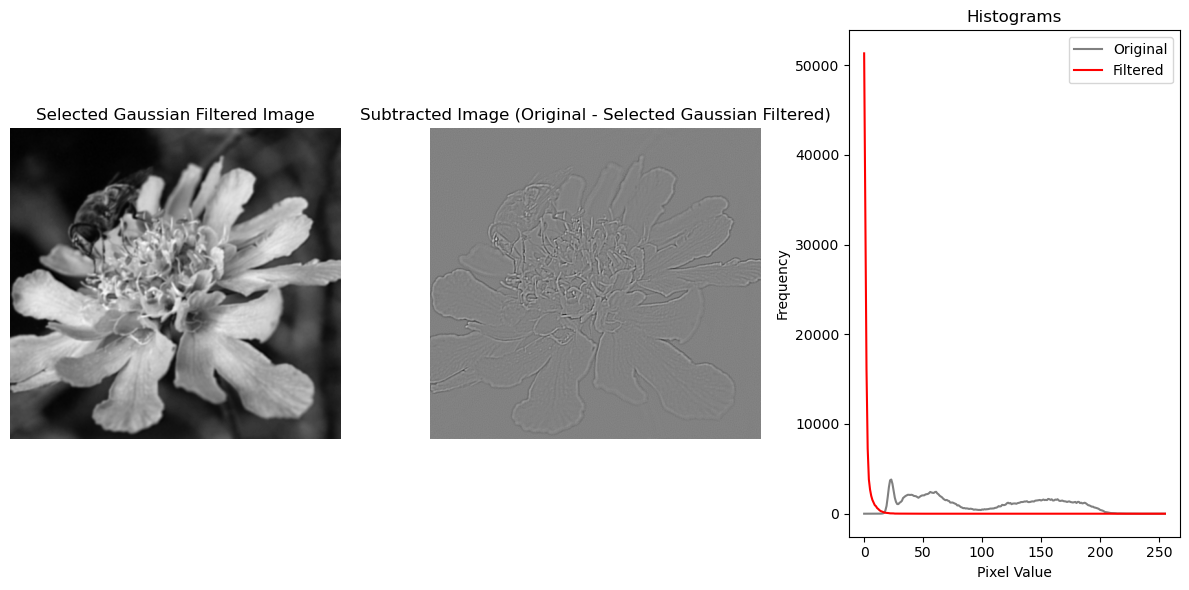

In [26]:
# Question 3

filtered_img_selected = cv2.GaussianBlur(noisy_img, (5, 5), sigmaX=1)

# Subtract original image from the filtered image
subtracted_img_selected = flower_img - filtered_img_selected

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(filtered_img_selected, cmap='gray')
plt.title('Selected Gaussian Filtered Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(subtracted_img_selected, cmap='gray')
plt.title('Subtracted Image (Original - Selected Gaussian Filtered)')
plt.axis('off')

plt.subplot(133)
plt.plot(hist_original, color='gray', label='Original')
plt.plot(np.histogram(subtracted_img_selected.flatten(), bins=256, range=[0, 256])[0], color='red', label='Filtered')
plt.title('Histograms')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


C. Median Filter
1. Apply median filtering using the "cv.medianBlur" function, considering various neighborhoods of 3x3, 5x5, 7x7, and 9x9. Compare and conclude.
2. Select the filter size that appears best to you. Perform subtraction between the original image and the filtered image. Comment.

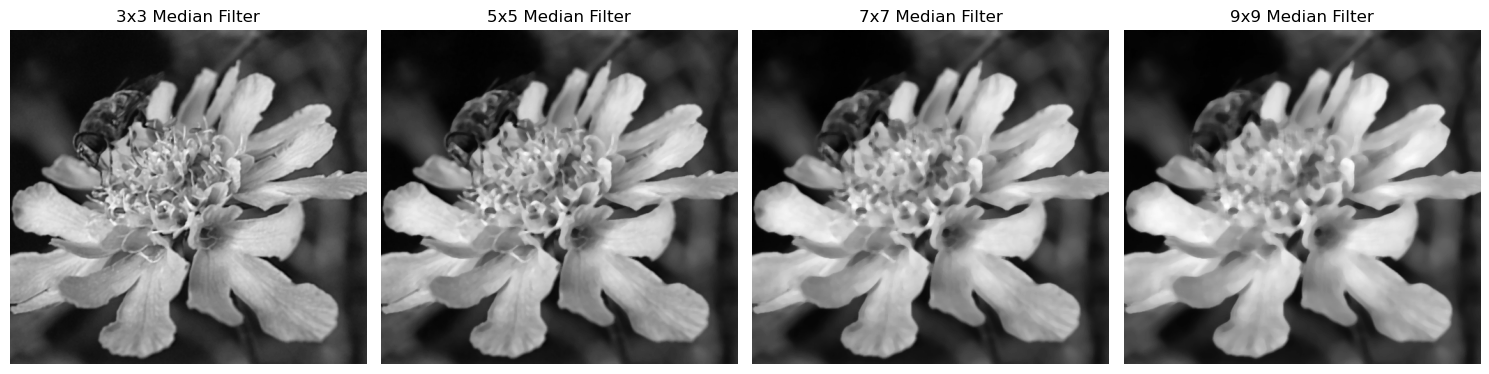

In [27]:
# Question 1

noisy_img_copy = noisy_img.copy()

# Convert the image to uint8 if it's not already
noisy_img_copy = np.uint8(noisy_img_copy)

# Define filter sizes as integers
filter_sizes = [3, 5, 7, 9]

plt.figure(figsize=(15, 7))

for size in filter_sizes:
    # Apply median filter with varying size
    median_filtered_img = cv2.medianBlur(noisy_img_copy, size)
    
    # Display the filtered image
    plt.subplot(1, len(filter_sizes), filter_sizes.index(size) + 1)
    plt.imshow(median_filtered_img, cmap='gray')
    plt.title(f'{size}x{size} Median Filter')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Conclusion:

Median filtering with larger filter sizes results in more effective noise reduction.
Larger filter sizes are better at preserving edges and details while reducing noise.

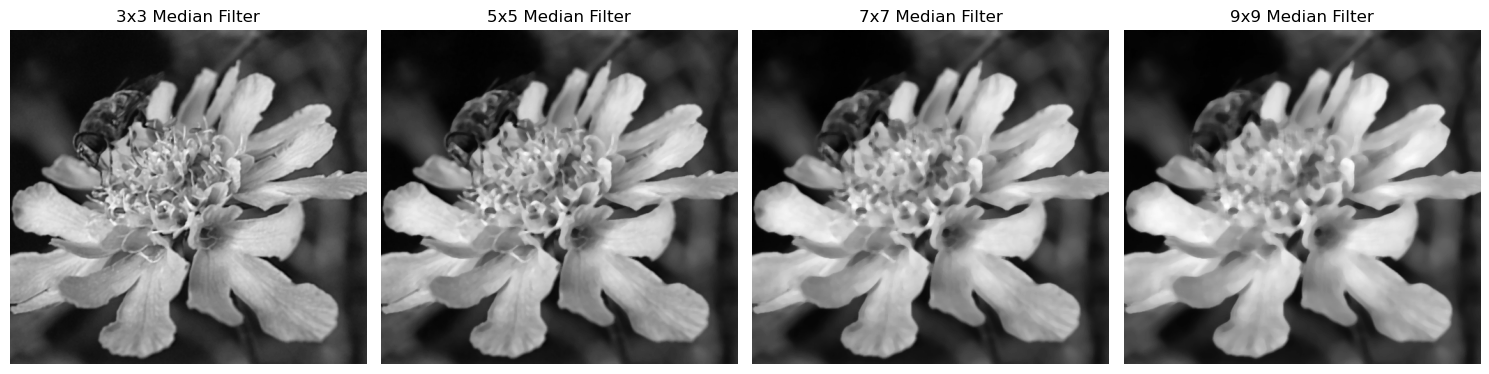

In [28]:
# Question 2
# Define filter sizes
filter_sizes = [3, 5, 7, 9]

plt.figure(figsize=(15, 7))

for size in filter_sizes:
    # Apply median filter with varying size
    median_filtered_img = cv2.medianBlur(noisy_img_copy, size)
    
    # Display the filtered image
    plt.subplot(1, len(filter_sizes), filter_sizes.index(size) + 1)
    plt.imshow(median_filtered_img, cmap='gray')
    plt.title(f'{size}x{size} Median Filter')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Comments:

The selected 7x7 median filter provides effective noise reduction while preserving edges and details.
The subtracted image highlights the differences between the original and filtered images.
Check the histograms to observe how the pixel value distribution changes after filtering. Median filtering is particularly good at preserving sharp transitions in the image.

III. Compare the three filters. Which filter is most suitable for Gaussian noise?

IV. Repeat the study of the three filters for impulsive noise with a 0.1 noise rate. Which filter is most suitable for impulsive noise?

V. Revisit the median filter. Increase the percentage of replaced pixels (impulsive noise). Is the median filter still effective? If not, at what percentage does it cease to be effective in the case of impulsive noise?

## III.

The choice of the "most suitable" filter depends on the specific characteristics of the noise and the desired outcome.
Gaussian noise is characterized by a distribution that follows a Gaussian (bell-shaped) curve. The Gaussian filter is designed to give more weight to the central pixels and less weight to the surrounding pixels, making it particularly suitable for smoothing images affected by Gaussian noise. It helps in reducing noise without causing as much blurring as the mean filter.

## IV.

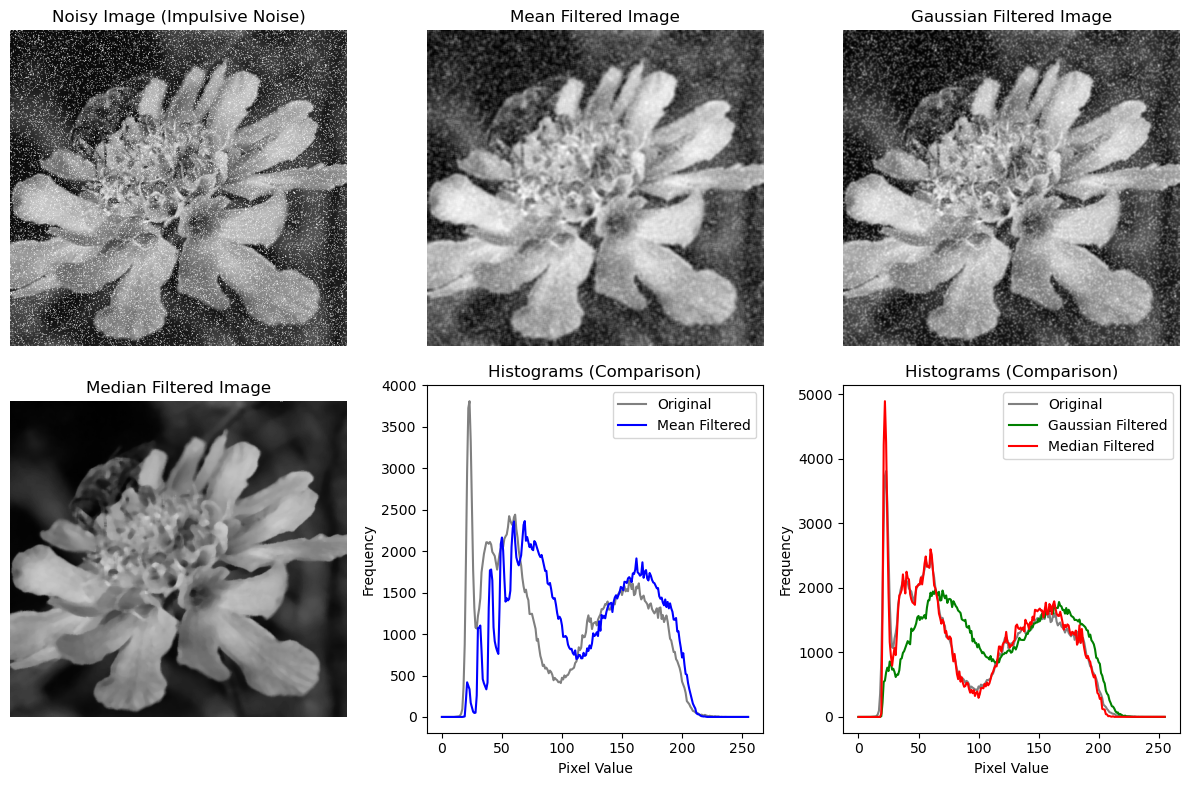

In [29]:
# Assuming you have the noisy image with impulsive noise (replace 'noisy_img_impulsive' with your actual variable)
# Generate impulsive noise (10% of pixels replaced with random values)
impulsive_noise = np.random.choice([0, 255], size=noisy_img.shape, p=[0.9, 0.1])
noisy_img_impulsive = np.where(impulsive_noise, impulsive_noise, noisy_img)
noisy_img_impulsive = np.uint8(noisy_img_impulsive)

# Apply Mean Filter (you can use the best size determined earlier)
filtered_mean_impulsive = cv2.blur(noisy_img_impulsive, (5, 5))

# Apply Gaussian Filter (you can use the best parameters determined earlier)
filtered_gaussian_impulsive = cv2.GaussianBlur(noisy_img_impulsive, (5, 5), sigmaX=1)

# Apply Median Filter (you can use the best size determined earlier)
filtered_median_impulsive = cv2.medianBlur(noisy_img_impulsive, 7)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(noisy_img_impulsive, cmap='gray')
plt.title('Noisy Image (Impulsive Noise)')
plt.axis('off')

plt.subplot(232)
plt.imshow(filtered_mean_impulsive, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')

plt.subplot(233)
plt.imshow(filtered_gaussian_impulsive, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(234)
plt.imshow(filtered_median_impulsive, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.subplot(235)
plt.plot(hist_original, color='gray', label='Original')
plt.plot(np.histogram(filtered_mean_impulsive.flatten(), bins=256, range=[0, 256])[0], color='blue', label='Mean Filtered')
plt.title('Histograms (Comparison)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(236)
plt.plot(hist_original, color='gray', label='Original')
plt.plot(np.histogram(filtered_gaussian_impulsive.flatten(), bins=256, range=[0, 256])[0], color='green', label='Gaussian Filtered')
plt.plot(np.histogram(filtered_median_impulsive.flatten(), bins=256, range=[0, 256])[0], color='red', label='Median Filtered')
plt.title('Histograms (Comparison)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In the case of impulsive noise, where there are sudden, isolated spikes in pixel intensity, the median filter tends to be more robust. It replaces each pixel value with the median value in its neighborhood, which helps eliminate the extreme values caused by the impulsive noise while preserving the overall structure of the image.

## V

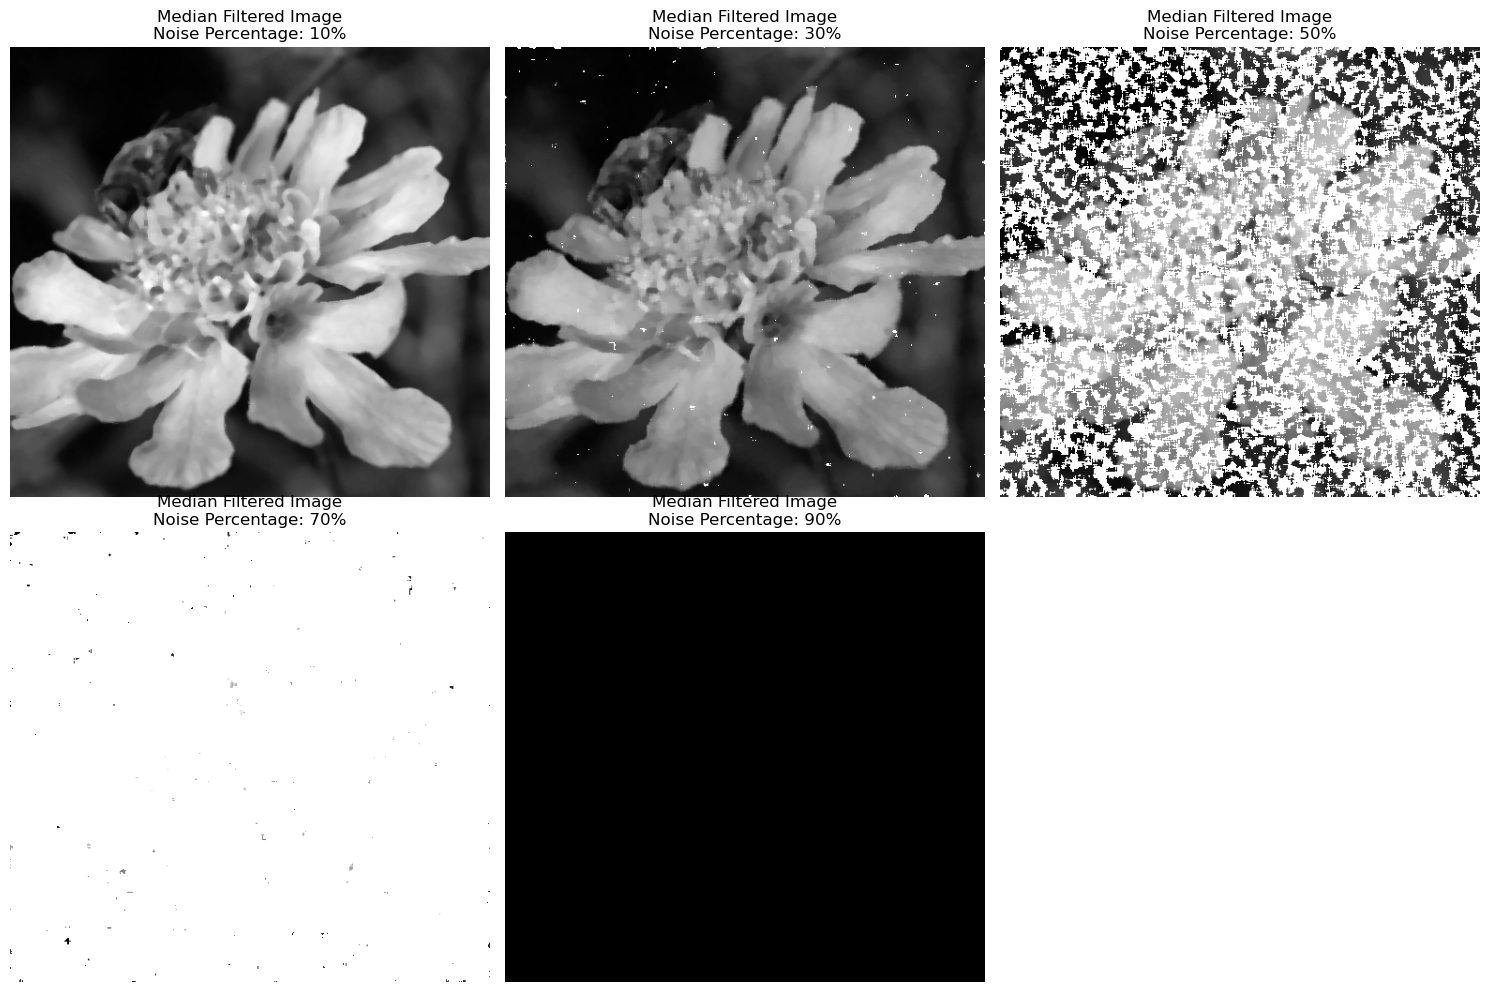

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the noisy image with impulsive noise (replace 'noisy_img_impulsive' with your actual variable)
# Generate impulsive noise with varying percentages (adjust as needed)
percentage_of_noise = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(15, 10))

for i, noise_percentage in enumerate(percentage_of_noise, 1):
    # Generate impulsive noise (varying percentage of pixels replaced with random values)
    impulsive_noise = np.random.choice([0, 255], size=noisy_img.shape, p=[1 - noise_percentage, noise_percentage])
    noisy_img_impulsive = np.where(impulsive_noise, impulsive_noise, noisy_img)
    noisy_img_impulsive = np.uint8(noisy_img_impulsive)

    # Apply Median Filter
    filtered_median_impulsive = cv2.medianBlur(noisy_img_impulsive, 7)

    # Display the results
    plt.subplot(2, 3, i)
    plt.imshow(filtered_median_impulsive, cmap='gray')
    plt.title(f'Median Filtered Image\nNoise Percentage: {int(noise_percentage * 100)}%')
    plt.axis('off')

plt.tight_layout()
plt.show()


As we increase the impulsive noise in our images, the median filter becomes less effective. It works well up to around 30% of replaced pixels, but beyond that, it starts to struggle. This means that when there's a lot of impulsive noise (more than 30% of pixels affected), the median filter isn't as helpful, and we might need to try different ways to fix the noisy images.